In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


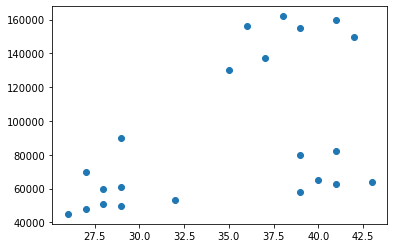

In [16]:
plt.scatter(df['Age'], df['Income($)'])

In [17]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,70000
1,Michael,0.176471,90000
2,Mohan,0.176471,61000
3,Ismail,0.117647,60000
4,Kory,0.941176,150000


In [18]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [20]:
model = KMeans(n_clusters=3)
y_predicted = model.fit_predict(df[['Age', 'Income($)']])

In [21]:
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [23]:
df['target'] = y_predicted
df.head()

,Name,Age,Income($),target
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [25]:
df1 = df[df['target'] == 0]
df2 = df[df['target'] == 1]
df3 = df[df['target'] == 2]

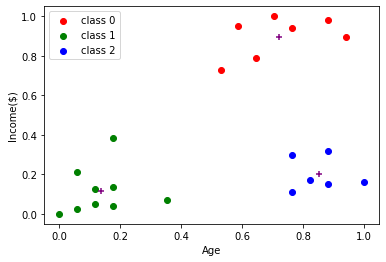

In [35]:
plt.scatter(df1['Age'], df1['Income($)'], c='red', label='class 0')
plt.scatter(df2['Age'], df2['Income($)'], c='green', label='class 1')
plt.scatter(df3['Age'], df3['Income($)'], c='blue', label='class 2')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='purple',marker='+')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [34]:
model.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [36]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.22020960864009395,
 0.17299621932455464,
 0.13265419827245162,
 0.10188787724979426]

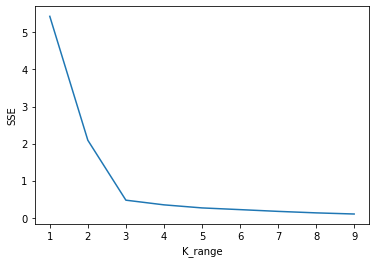

In [40]:
plt.xlabel('K_range')
plt.ylabel('SSE')
plt.plot(k_range, sse)